# Exploratory Data Analysis of Iris

This community will complete data wrangling and visualization on the Iris. To access your dataset, please use this link : https://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
#Loading dataset and adding column names
iris = pd.read_csv('iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','species'])

Dataset downloaded from the UCI data repository is in .data format, I will be converting it to .csv format

In [3]:
iris.to_csv('iris_new.csv', index = False)

In [4]:
#Loading dataset
iris_data = pd.read_csv('iris_new.csv')

In [5]:
#Checking first five columns
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Checking for null values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No null values

In [7]:
#Getting statistical description of dataset
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Getting the number of rows and columns in the dataset
iris_data.shape

(150, 5)

In [9]:
#Getting dataset information
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visualization

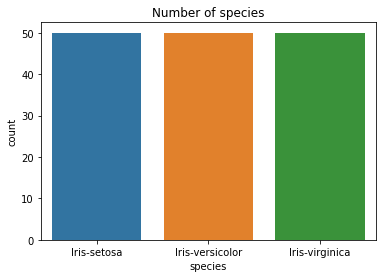

In [11]:
#Retrieving countplot of species in dataset
plt.title('Number of species')
sns.countplot(iris_data['species'])

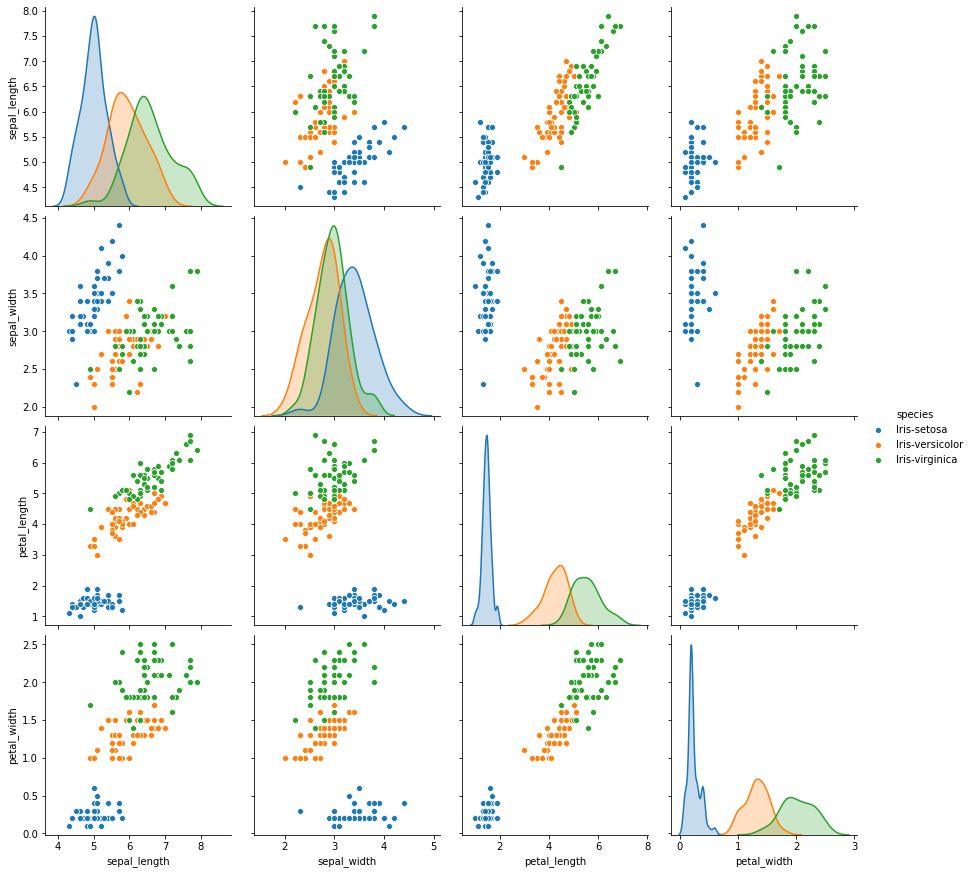

In [12]:
#Using pairplot to visualize all columns
sns.pairplot(iris_data, hue = "species", height = 3)

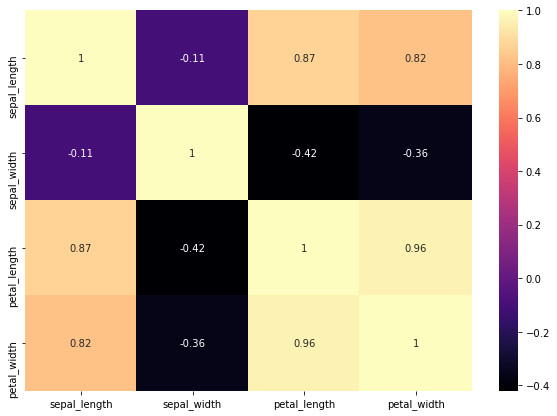

In [13]:
#Using heatmap to visualize correlation of variables
iris_fig = plt.figure(figsize = (10,7))
sns.heatmap(iris_data.corr(), cmap = "magma", annot = True)

(array([ 8., 39., 48., 40., 11.,  4.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4]),
 <a list of 6 Patch objects>)

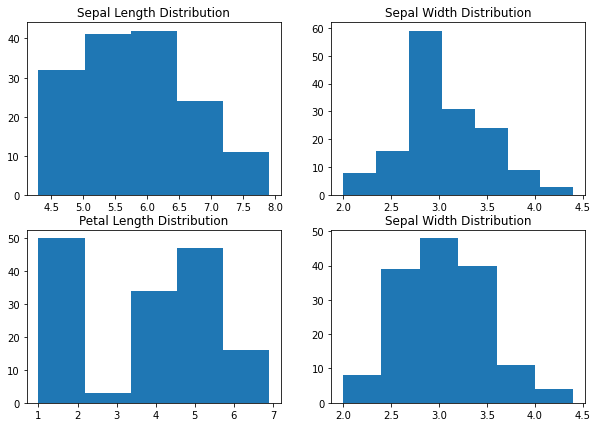

In [15]:
#Using histogram to visualize data distribution of columns
fig, axes = plt.subplots(2, 2, figsize = (10,7))
axes[0, 0].set_title("Sepal Length Distribution")
axes[0, 0].hist(iris_data['sepal_length'], bins = 5)
axes[0, 1].set_title("Sepal Width Distribution")
axes[0, 1].hist(iris_data['sepal_width'], bins = 7)
axes[1, 0].set_title("Petal Length Distribution")
axes[1, 0].hist(iris_data['petal_length'], bins = 5)
axes[1, 1].set_title("Sepal Width Distribution")
axes[1, 1].hist(iris_data['sepal_width'], bins = 6)

Analyzing each data column separately

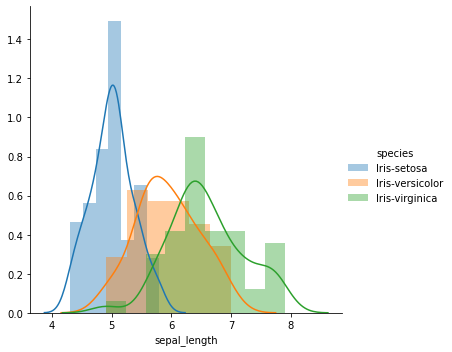

In [17]:
#Analyzing sepal length
sns.FacetGrid(iris_data, hue = "species", height = 5).map(sns.distplot, "sepal_length").add_legend()

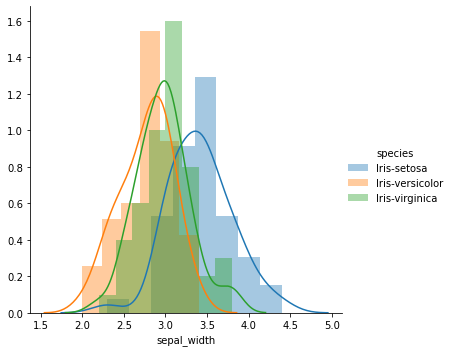

In [18]:
#Analyzing sepal width
sns.FacetGrid(iris_data, hue = "species", height = 5).map(sns.distplot, "sepal_width").add_legend()

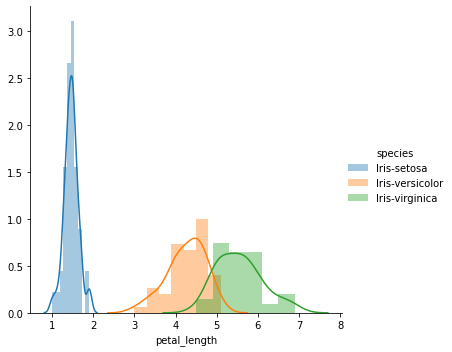

In [19]:
#Analyzing petal length
sns.FacetGrid(iris_data, hue = "species", height = 5).map(sns.distplot, "petal_length").add_legend()

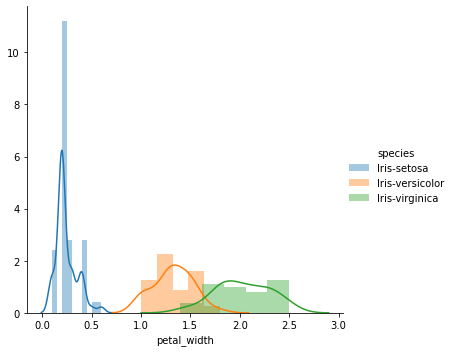

In [20]:
#Analyzing petal width
sns.FacetGrid(iris_data, hue = "species", height = 5).map(sns.distplot, "petal_width").add_legend()

In [21]:
iris_ind = []
for i in range(100):
    iris_ind.append(i)

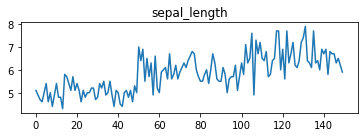

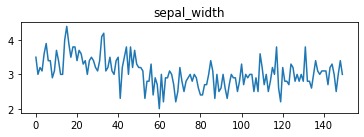

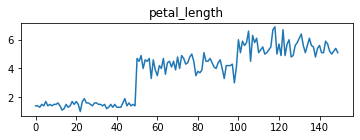

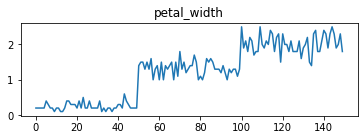

In [22]:
for i, col in enumerate(iris_data.iloc[:,0:4].columns.values):
    plt.subplot(6,2, i+1)
    plt.plot(iris_data[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
    plt.show()

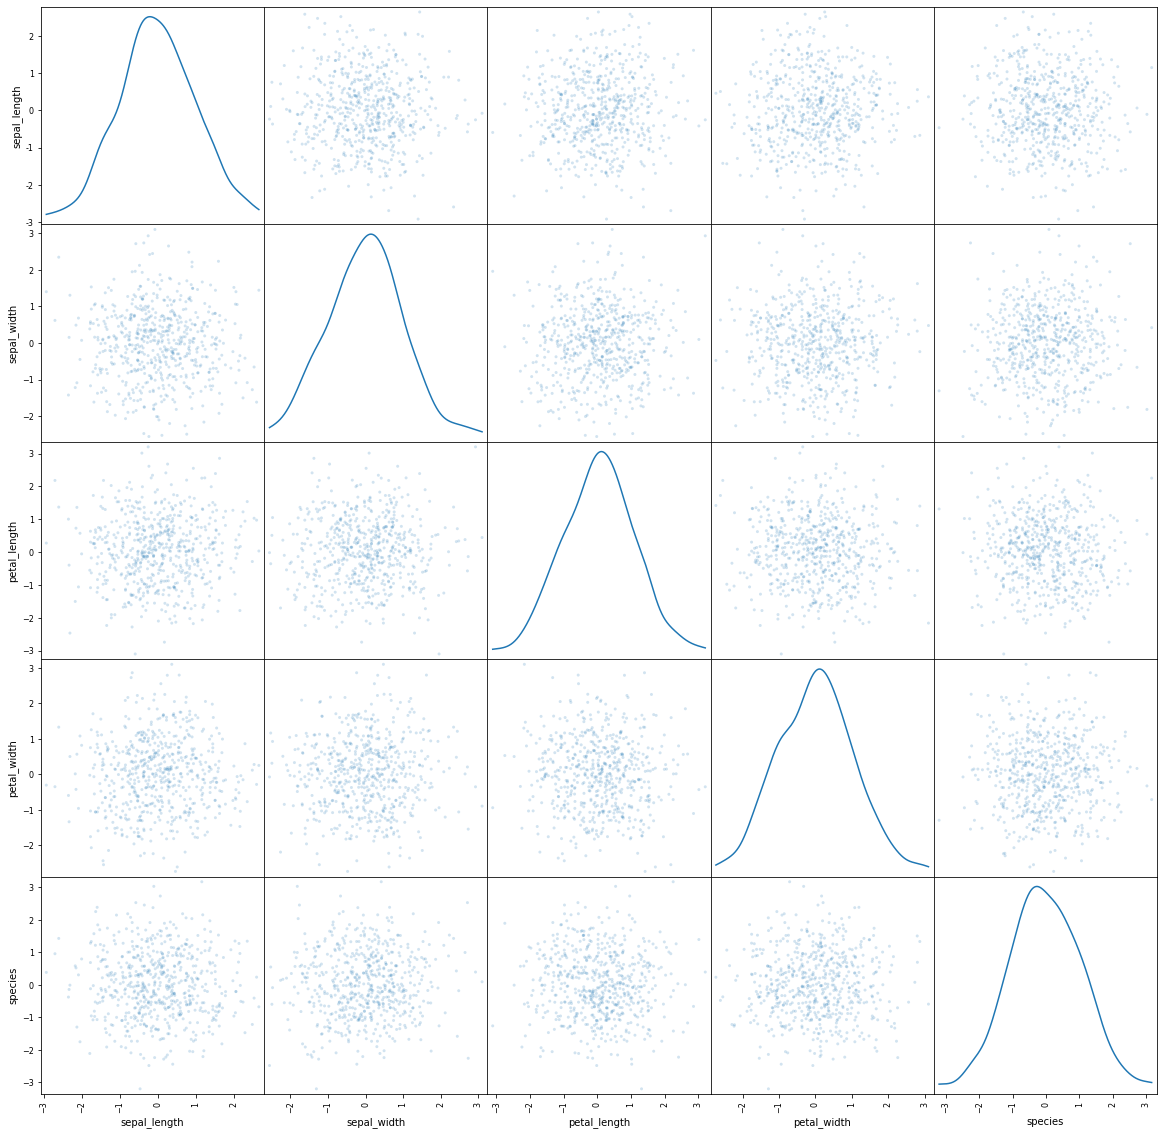

In [23]:
#Using scatter matrix
data = pd.DataFrame(np.random.randn(600, 5), columns = iris_data.columns)
scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

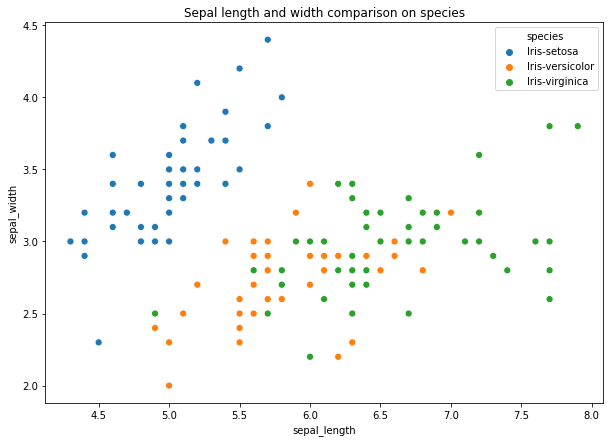

In [24]:
#Scatter plot to visualize sepal length and sepal width in comparison to the species
plt.figure(figsize = (10,7))
plt.title("Sepal length and width comparison on species")
sns.scatterplot(iris_data['sepal_length'], iris_data['sepal_width'], hue = iris_data['species'], s = 50)